In [69]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.read_csv("auto_mpg.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [70]:
import numpy as np
import pandas as pd

# Replace '?' with NaN and convert 'horsepower' to float
df['horsepower'] = df['horsepower'].replace('?', np.nan).astype(float)

# Filling missing values for 'horsepower' with the mean
mean_horsepower = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(mean_horsepower)

# Display the head of the preprocessed dataframe
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [71]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read the data
df = pd.read_csv("auto_mpg.csv")

# Clean up column names (e.g., remove extra spaces)
df.columns = df.columns.str.strip()

# Check if 'origin' exists and convert to string type (if needed)
if 'origin' in df.columns:
    df['origin'] = df['origin'].astype(str)
else:
    print("Error: 'origin' column not found in dataset")

# Identify categorical columns
categorical_cols = ['origin']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical column
encoded_origin = encoder.fit_transform(df[categorical_cols])

# Convert encoded data into a DataFrame
encoded_origin_df = pd.DataFrame(encoded_origin, 
                                 columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with the original DataFrame (dropping original categorical columns)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_origin_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df_encoded.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

                    car name  origin_2  origin_3  
0  chevrolet chevelle malibu       0.0       0.0  
1          buick skylark 320       0.0       0.0  
2         plymouth satellite       0.0       0.0  
3              amc rebel sst       0.0       0.0  
4                ford torino       0.0       0.0  


In [72]:
# Scaling numeric features using StandardScaler
# Identifying numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting and transforming the numeric columns
scaled_numeric = scaler.fit_transform(df_encoded[numeric_cols])

# Creating a DataFrame from the scaled columns
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# Concatenating the scaled numeric DataFrame with the encoded DataFrame
final_df = pd.concat([scaled_numeric_df, df_encoded.drop(numeric_cols, axis=1)], axis=1)

# Displaying the head of the final scaled DataFrame
print(final_df.head())

        mpg  cylinders  displacement    weight  acceleration  model year  \
0 -0.706439   1.498191      1.090604  0.630870     -1.295498   -1.627426   
1 -1.090751   1.498191      1.503514  0.854333     -1.477038   -1.627426   
2 -0.706439   1.498191      1.196232  0.550470     -1.658577   -1.627426   
3 -0.962647   1.498191      1.061796  0.546923     -1.295498   -1.627426   
4 -0.834543   1.498191      1.042591  0.565841     -1.840117   -1.627426   

   origin_2  origin_3 horsepower                   car name  
0 -0.461968 -0.497643        130  chevrolet chevelle malibu  
1 -0.461968 -0.497643        165          buick skylark 320  
2 -0.461968 -0.497643        150         plymouth satellite  
3 -0.461968 -0.497643        150              amc rebel sst  
4 -0.461968 -0.497643        140                ford torino  


In [73]:
# Checking for duplicate rows in the DataFrame
duplicates = df.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [74]:
# Select only numeric columns
#the aim isto find any outliers- these are datapoints different from the rest and may cause skewed results
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers per column
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()

# Print outlier count per column
print("Number of outliers in each numeric column:")
print(outliers)


Number of outliers in each numeric column:
mpg             1
cylinders       0
displacement    0
weight          0
acceleration    7
model year      0
dtype: int64


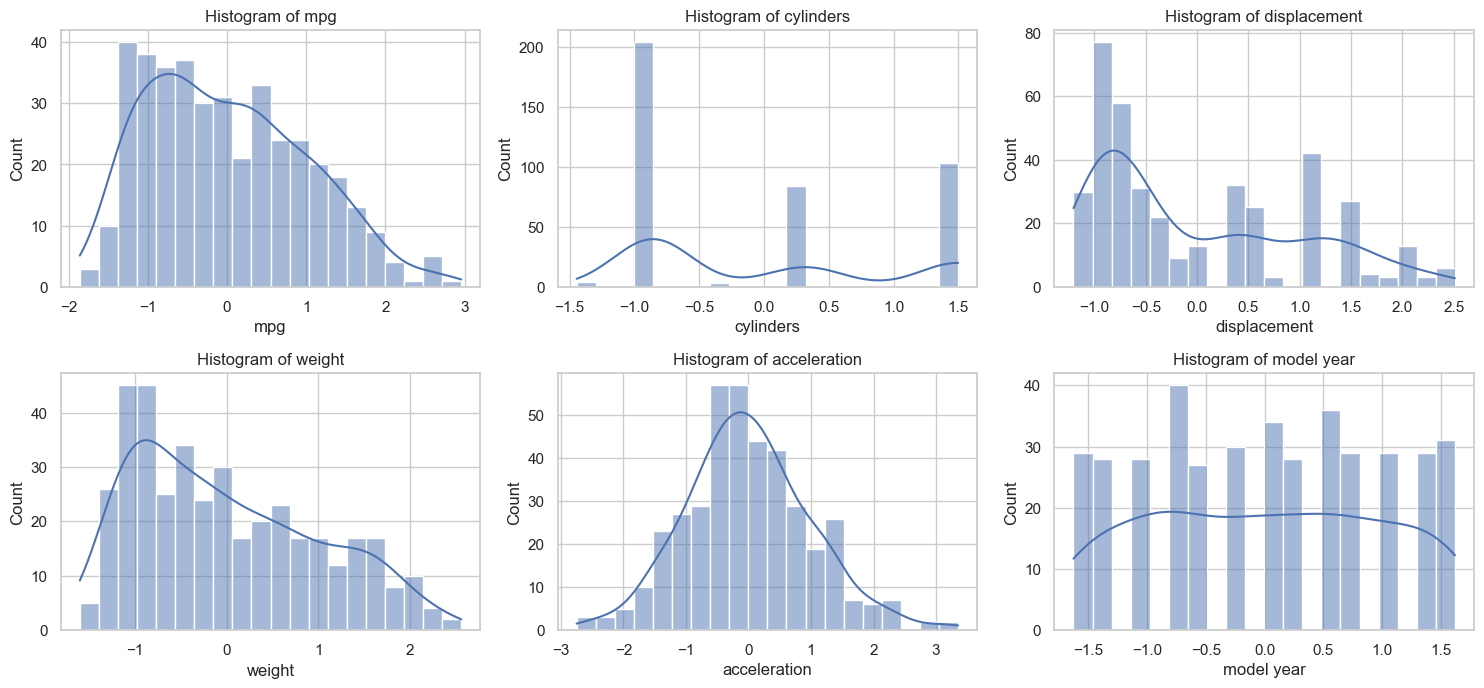

In [75]:
# Conducting Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')

# Creating a histogram for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(final_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()



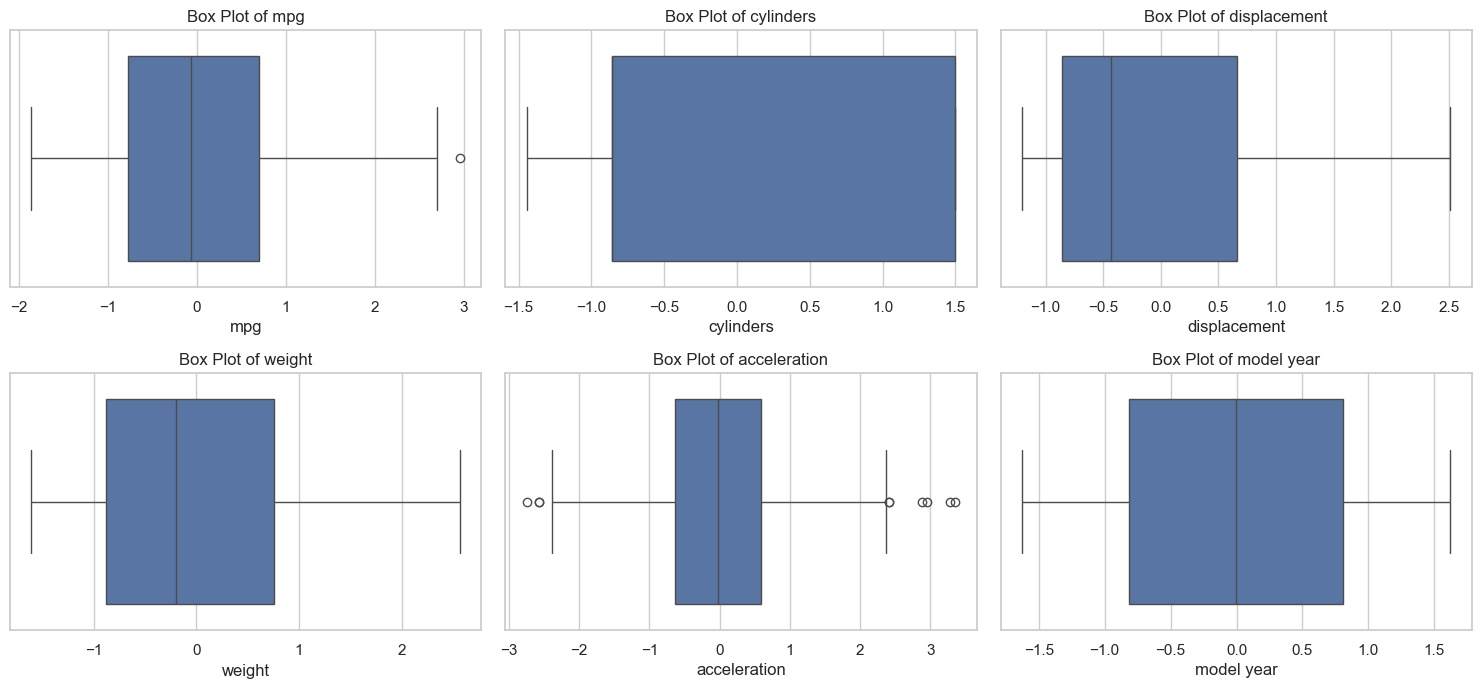

In [76]:
# Creating box plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=final_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

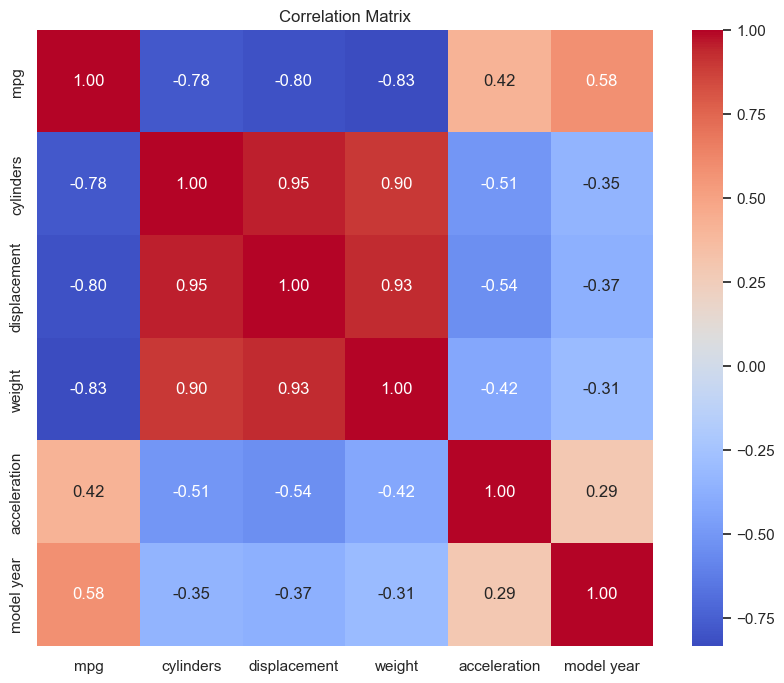

In [77]:
# Creating a correlation matrix
correlation_matrix = final_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [78]:
# Calculating summary statistics
summary_statistics = final_df.describe()
print(summary_statistics)

                mpg     cylinders  displacement        weight  acceleration  \
count  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02   
mean   7.141133e-17 -3.570567e-17 -1.785283e-17 -1.606755e-16 -2.677925e-16   
std    1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00   
min   -1.859374e+00 -1.444949e+00 -1.204411e+00 -1.604943e+00 -2.747814e+00   
25%   -7.704907e-01 -8.563206e-01 -8.563178e-01 -8.828266e-01 -6.328794e-01   
50%   -6.591883e-02 -8.563206e-01 -4.314040e-01 -1.973624e-01 -2.472221e-02   
75%    7.027050e-01  1.498191e+00  6.584879e-01  7.538337e-01  5.834349e-01   
max    2.957335e+00  1.498191e+00  2.511784e+00  2.565185e+00  3.351912e+00   

         model year      origin_2    origin_3  
count  3.980000e+02  3.980000e+02  398.000000  
mean  -1.642461e-15 -5.802171e-17    0.000000  
std    1.001259e+00  1.001259e+00    1.001259  
min   -1.627426e+00 -4.619682e-01   -0.497643  
25%   -8.150739e-01 -4.619682e-01   -0.497643  


In [79]:
# Analyzing patterns and anomalies in the summary statistics
# Identifying potential anomalies based on summary statistics
anomalies = {}

# Checking for features with outliers based on IQR method
for col in numeric_cols:
    if (final_df[col] < lower_bound[col]).any() or (final_df[col] > upper_bound[col]).any():
        anomalies[col] = final_df[(final_df[col] < lower_bound[col]) | (final_df[col] > upper_bound[col])]

# Displaying the anomalies found
anomalies_summary = {col: len(anomalies[col]) for col in anomalies}
print('Anomalies found in the following columns:')
print(anomalies_summary)

Anomalies found in the following columns:
{'mpg': 243, 'weight': 398, 'acceleration': 398, 'model year': 398}


In [80]:
# Extracting the rows corresponding to the identified anomalies
anomalous_rows = pd.concat([anomalies[col] for col in anomalies])

# Displaying the anomalous rows
print(anomalous_rows)

          mpg  cylinders  displacement    weight  acceleration  model year  \
0   -0.706439   1.498191      1.090604  0.630870     -1.295498   -1.627426   
1   -1.090751   1.498191      1.503514  0.854333     -1.477038   -1.627426   
2   -0.706439   1.498191      1.196232  0.550470     -1.658577   -1.627426   
3   -0.962647   1.498191      1.061796  0.546923     -1.295498   -1.627426   
4   -0.834543   1.498191      1.042591  0.565841     -1.840117   -1.627426   
..        ...        ...           ...       ...           ...         ...   
393  0.446497  -0.856321     -0.513026 -0.213324      0.011586    1.621983   
394  2.624265  -0.856321     -0.925936 -0.993671      3.279296    1.621983   
395  1.087017  -0.856321     -0.561039 -0.798585     -1.440730    1.621983   
396  0.574601  -0.856321     -0.705077 -0.408411      1.100822    1.621983   
397  0.958913  -0.856321     -0.714680 -0.296088      1.391285    1.621983   

     origin_2  origin_3 horsepower                   car name  

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Read the data
df = pd.read_csv("auto_mpg.csv")

# Replace '?' with NaN for the 'horsepower' column or other numeric columns with invalid values
df.replace('?', float('nan'), inplace=True)

# Convert columns to numeric (if needed)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # This ensures invalid values are turned into NaN

# Handle missing values by using SimpleImputer (e.g., filling with the mean)
imputer = SimpleImputer(strategy='mean')  # You can also use median or most_frequent depending on the dataset
df['horsepower'] = imputer.fit_transform(df[['horsepower']])

# Drop non-numeric columns like 'car name'
df = df.drop(columns=['car name'])

# Convert categorical columns ('origin' in this case) to numeric using OneHotEncoder
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_2  origin_3  
0          70     False     False  
1          70     False     False  
2          70     False     False  
3          70     False     False  
4          70     False     False  


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Selecting features and target variable
X = df.drop(columns=['mpg'])  # Features
y = df['mpg']  # Target variable  # Target variable is mpg which is continues in nature thure we will train our model using LinearRegression() and RandomForestRegressor()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate model
def evaluate_model(model):
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Results:")
    print("Training Score:", model.score(X_train, y_train))
    print("Testing Score:", model.score(X_test, y_test))
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Evaluate all models
evaluate_model(linear_model)
evaluate_model(rf_model)
evaluate_model(svr_model)



LinearRegression Results:
Training Score: 0.8188288951042786
Testing Score: 0.8449006123776617
R² Score: 0.8449006123776617
MAE: 2.2875867704421062
RMSE: 2.887757347883631

RandomForestRegressor Results:
Training Score: 0.9810189898945959
Testing Score: 0.9105817015747857
R² Score: 0.9105817015747857
MAE: 1.6282625
RMSE: 2.1926476945692848

SVR Results:
Training Score: 0.6822466941226436
Testing Score: 0.7443703998722819
R² Score: 0.7443703998722819
MAE: 2.7896374946347606
RMSE: 3.7073298364324083


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define models and parameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {
            "model__fit_intercept": [True, False]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10, 20]
        }
    },
    "Support Vector Regressor": {
        "model": SVR(),
        "params": {
            "model__kernel": ['rbf', 'linear'],
            "model__C": [0.1, 1, 10]
        }
    }
}

# Run GridSearchCV for each model
for name, config in models.items():
    print(f"\nRunning GridSearchCV for {name}...")
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation R² Score:", grid_search.best_score_)



Running GridSearchCV for Linear Regression...
Best Parameters: {'model__fit_intercept': True}
Best Cross-Validation R² Score: 0.8051208154450616

Running GridSearchCV for Random Forest...
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 200}
Best Cross-Validation R² Score: 0.843885861730515

Running GridSearchCV for Support Vector Regressor...
Best Parameters: {'model__C': 10, 'model__kernel': 'rbf'}
Best Cross-Validation R² Score: 0.8516730337047512
